# Q1:perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [42]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
#import dataset
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines (1).csv to EastWestAirlines (1) (1).csv


In [45]:
data=pd.read_csv("EastWestAirlines (1).csv")

In [46]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [47]:
#Column Rename and Set ID as Index Column
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
data.set_index('ID',inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [48]:
data.shape

(3999, 11)

In [7]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [9]:
#Missing values
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [49]:
data.duplicated().sum()

1

In [50]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [51]:
# droping the duplicated row
data=data.drop_duplicates()

Exploratory Data Analysis

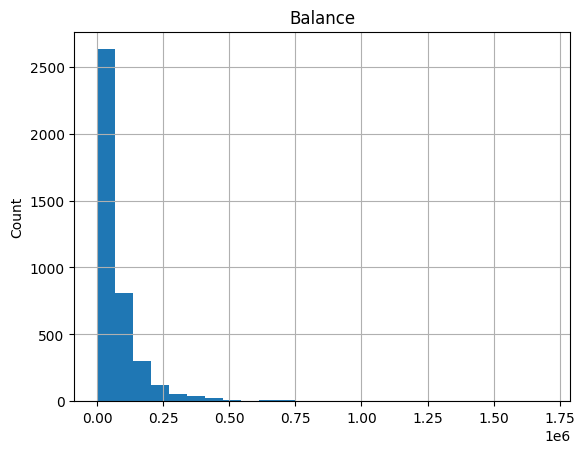

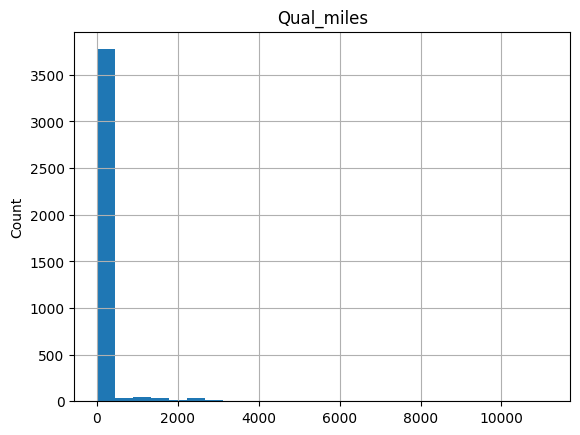

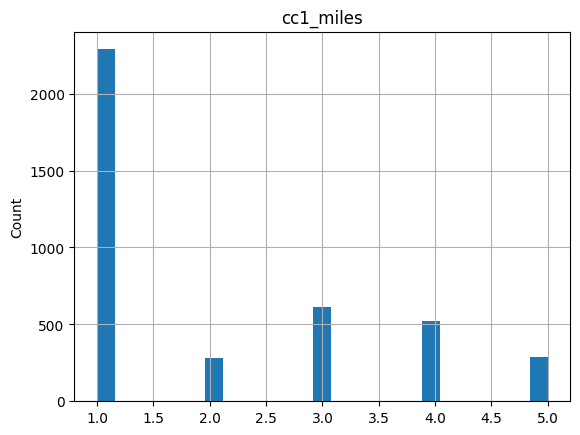

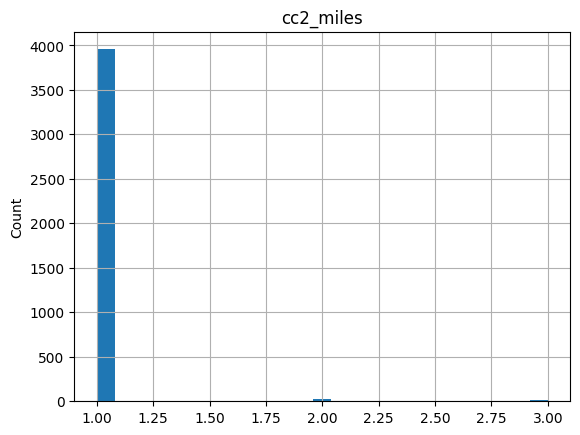

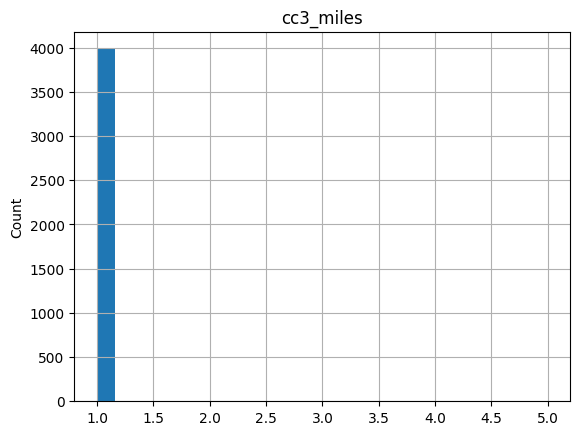

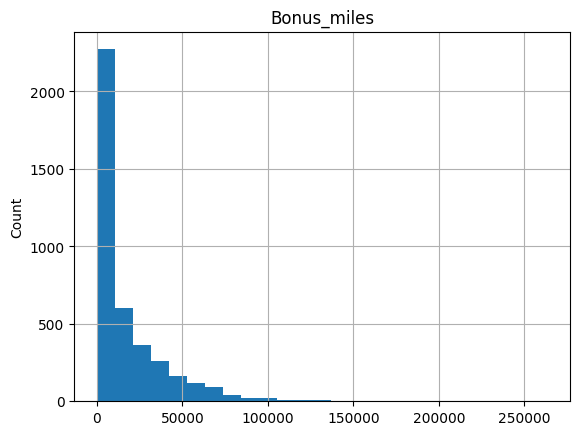

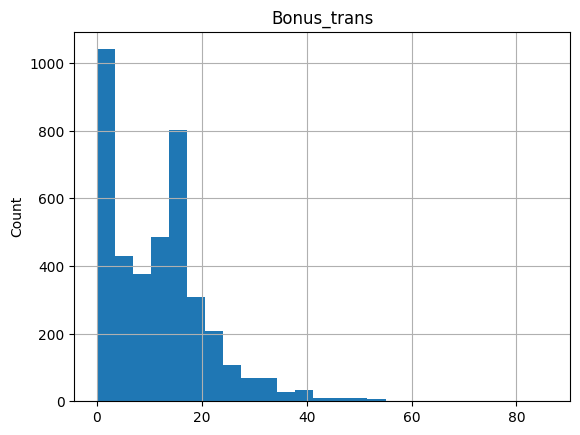

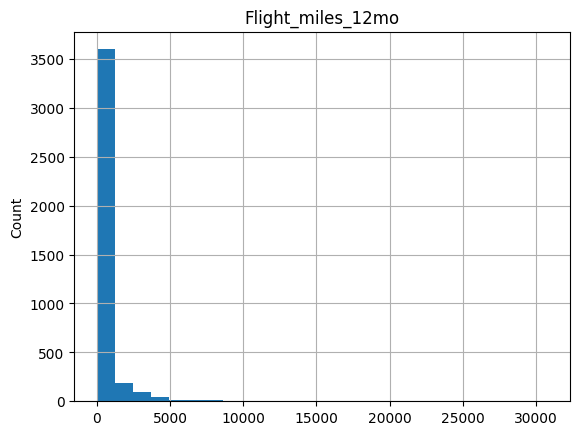

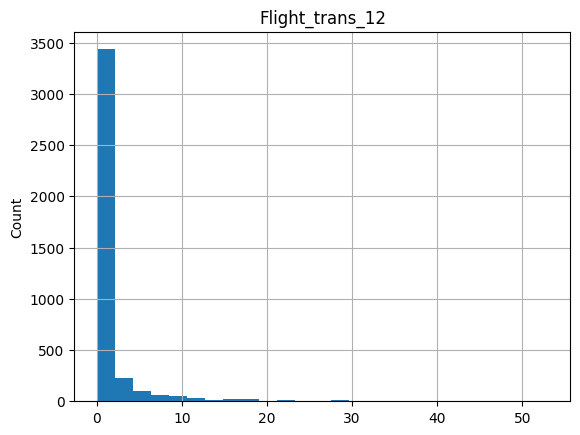

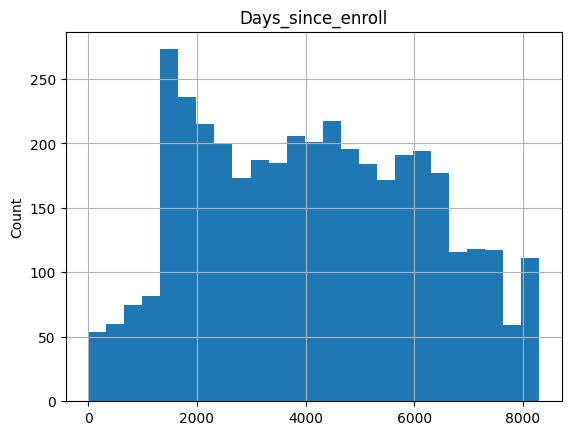

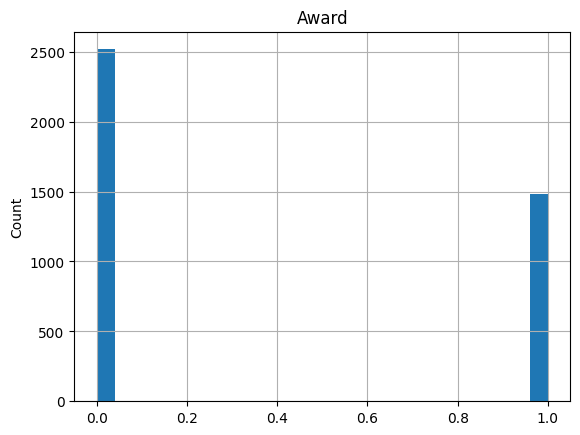

In [10]:
for feature in data.columns:
    data =data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [11]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

Outliers Detection

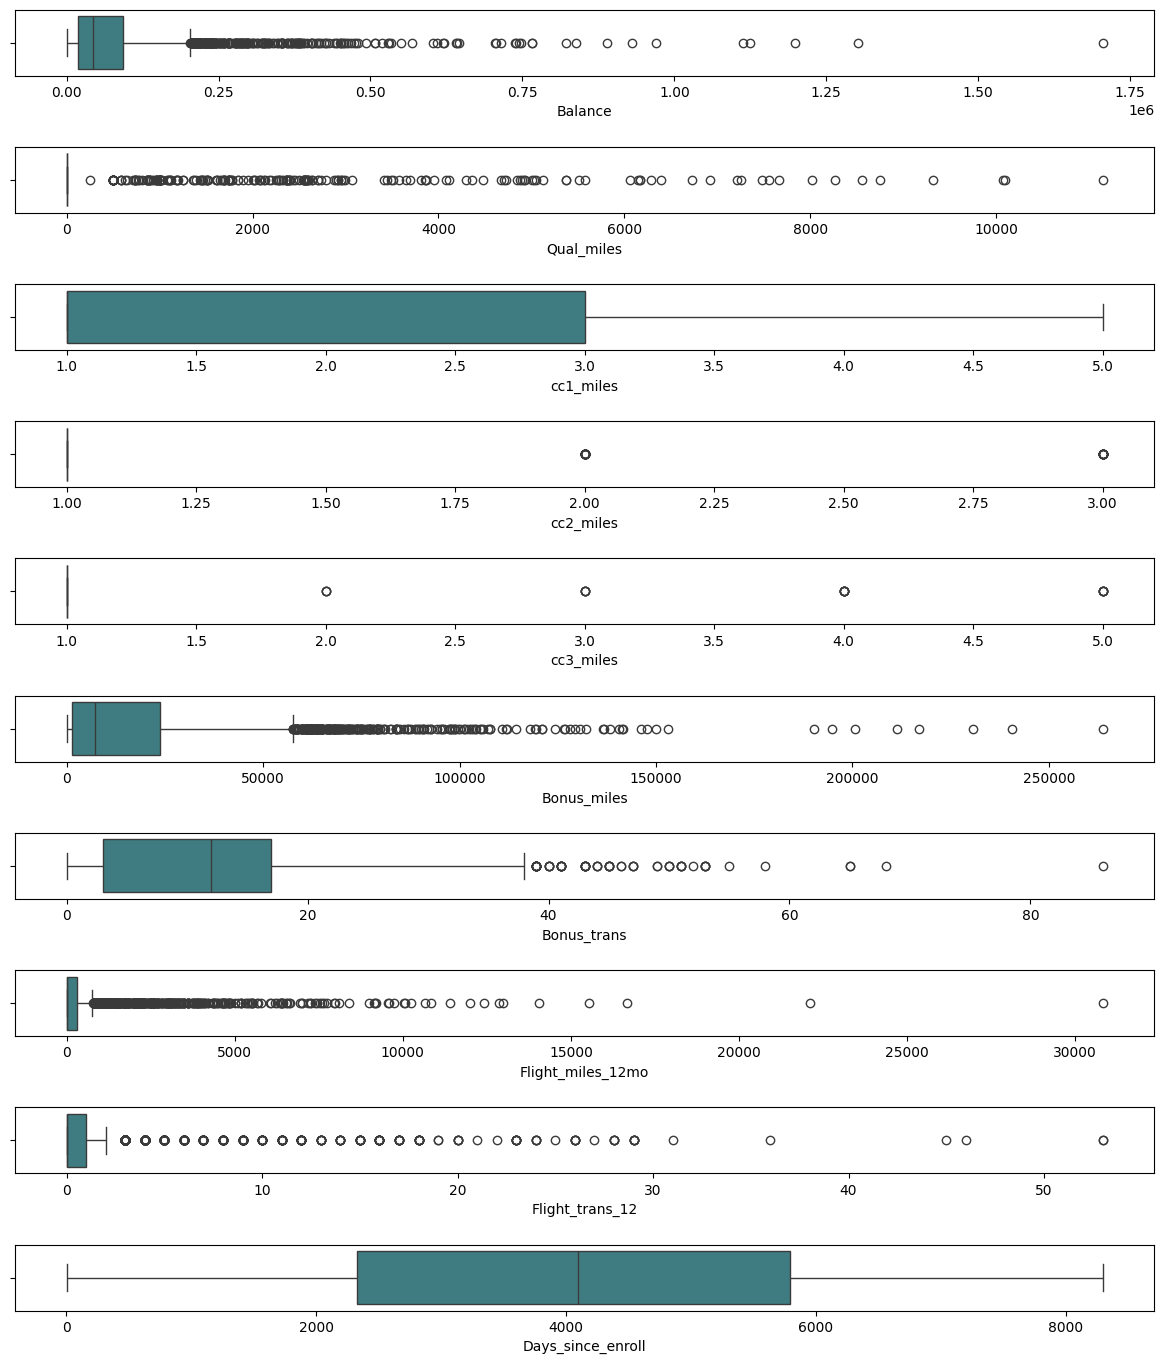

In [12]:
outlier = data.copy()
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

Correlation Heatmap

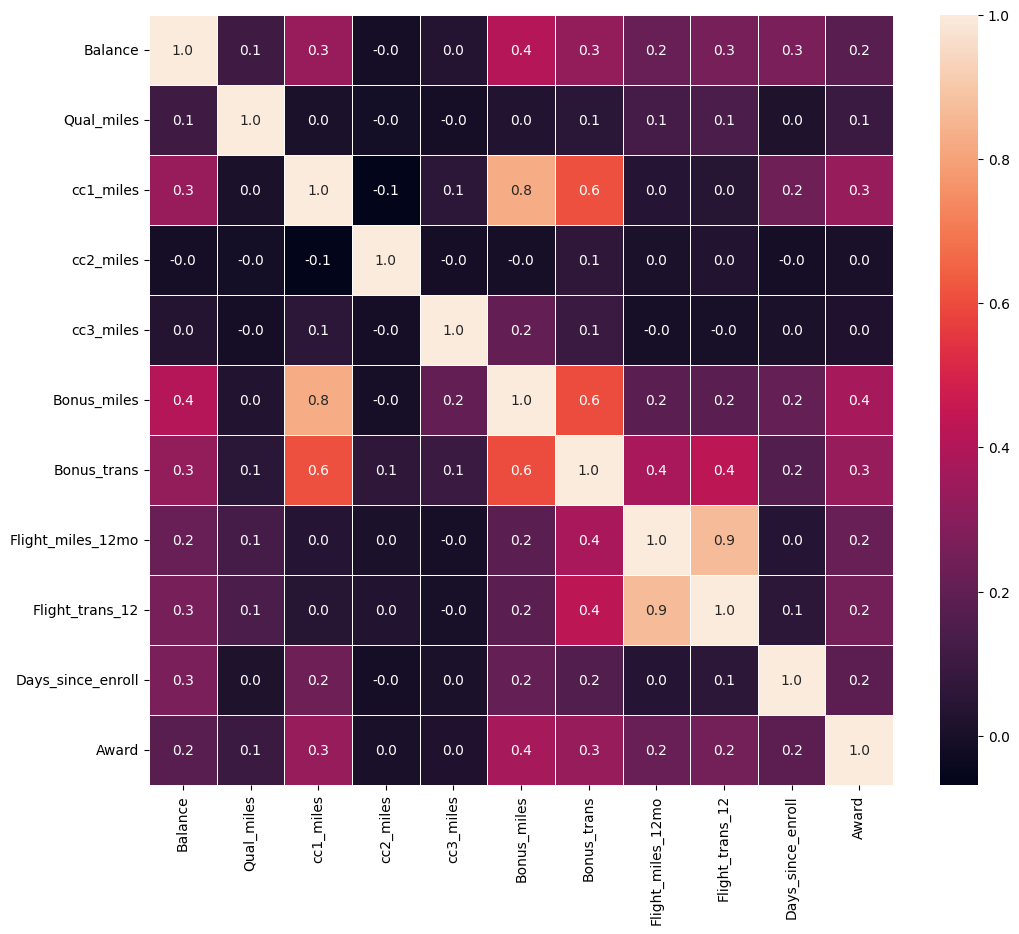

In [41]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

# K Mean Clustering

K Means Clustering
 Elbow Method for Determining Cluster Amount
Standard Scaler Applied on Data

In [52]:
kmeans_data=data

In [53]:
kmeans_data.shape

(3998, 11)

# Scale the data - Standardize

In [54]:
# Standardisation function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans_scaled_data =scaler.fit_transform(kmeans_data)

In [55]:
kmeans_scaled_data

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [62]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(kmeans_scaled_data)

KMeans(n_clusters=4, random_state=0)

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [63]:
predict=kmeans.fit_predict(kmeans_scaled_data)

In [65]:
predict

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [66]:
kmeans.inertia_

27148.665385482615

In [57]:
# within-cluster sum-of-squares criterion
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(kmeans_scaled_data)
    wcss.append(kmeans.inertia_)

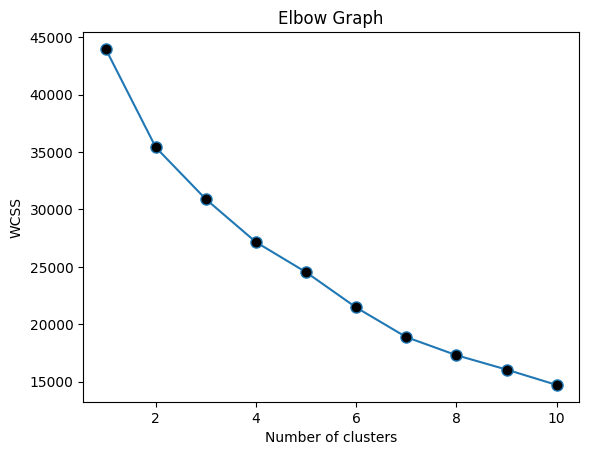

In [60]:
plt.plot(range(1,11),wcss,marker='o',markersize=8,markerfacecolor='black')
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

silhouette score

In [61]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(kmeans_scaled_data)
    sil_score1= silhouette_score(kmeans_scaled_data, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.32531882107641713
For n_clusters = 3 The average silhouette_score is : 0.3120743629337082
For n_clusters = 4 The average silhouette_score is : 0.31003837126661404
For n_clusters = 5 The average silhouette_score is : 0.32371282485521125
For n_clusters = 6 The average silhouette_score is : 0.33378006995858245
For n_clusters = 7 The average silhouette_score is : 0.22365222966492318
For n_clusters = 8 The average silhouette_score is : 0.237314726017899
For n_clusters = 9 The average silhouette_score is : 0.24489425763143474


In [67]:
# we taking number of cluster as 6
final_model=KMeans(n_clusters=6,random_state=0)
final_model.fit(kmeans_scaled_data)

KMeans(n_clusters=6, random_state=0)

In [68]:
final_model.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [69]:
# creating a new column Label
kmeans_data["kmeans_Label"]=final_model.labels_
kmeans_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_Label
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
4018,64385,0,1,1,1,981,5,0,0,1395,1,2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [70]:
# grouping by Labels
kmeans_grp=data.groupby('kmeans_Label')

In [72]:
for x,y in kmeans_grp:
    print(y)
    print('_________________'*60)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
43      60313           0          1          1          1        10000   
51     108137           0          1          1          1         6368   
66      53914           0          3          1          1        33767   
97     185549           0          5          1          1       110859   
115    124198           0          5          1          1        66330   
...       ...         ...        ...        ...        ...          ...   
3930   126490           0          1          1          1         8808   
3934    55922        2273          1          1          1         8104   
3940   130748           0          4          1          1        65510   
3957    76595           0          1          1          1        10577   
3973    59650           0          1          1          1         5050   

      Bonus_trans  Fligh

In [73]:
kmeans_grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
kmeans_Label,,,,,,,,,,,
0,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236
2,43899.574007,43.575612,1.229844,1.000000,1.000401,4646.073004,6.855596,199.240273,0.621340,3707.224629,0.200963
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


In [74]:
sgrp=kmeans_data.groupby("Award")

In [75]:
sgrp.agg("mean")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,kmeans_Label
Award,,,,,,,,,,,
0,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,1.851808
1,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.392302


In [76]:
count_df = kmeans_data.groupby(['kmeans_Label']).count()
count_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
kmeans_Label,,,,,,,,,,,
0,143,143,143,143,143,143,143,143,143,143,143
1,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
2,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493
3,43,43,43,43,43,43,43,43,43,43,43
4,15,15,15,15,15,15,15,15,15,15,15
5,61,61,61,61,61,61,61,61,61,61,61


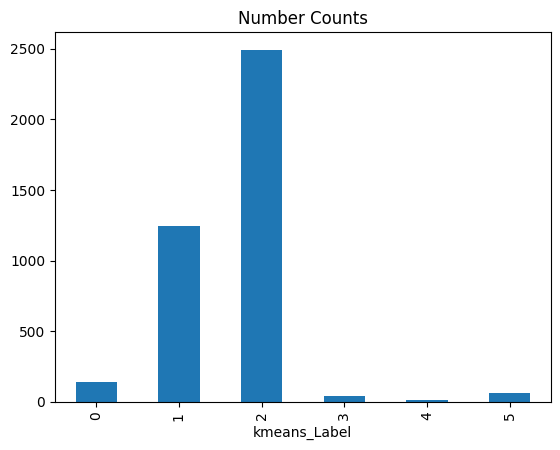

In [77]:
count = count_df.xs('Balance' ,axis = 1)
count.plot(kind='bar', title= 'Number Counts')
plt.show()

In [78]:
silhouette_avg = silhouette_score(kmeans_scaled_data, final_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.33378006995858245


# DBSCAN (Density Based Spatial Clustering of Applications with Noise)

In [79]:
from sklearn.cluster import DBSCAN

In [80]:
data=pd.read_csv("EastWestAirlines (1).csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [83]:
dbscan_data=data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
dbscan_data=data.drop_duplicates()
dbscan_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [84]:
#scailing the data using MinMax scalar
scaler=MinMaxScaler()
dbscan_scaled_data=scaler.fit_transform(dbscan_data)
dbscan_scaled_data

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [85]:
dbscan_model=DBSCAN(min_samples=12,eps=0.5 )

In [86]:
dbscan_model.fit(dbscan_scaled_data)

DBSCAN(min_samples=12)

In [87]:
dbscan_model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [88]:
dbscan_data["dbscan_Label"]=dbscan_model.labels_
dbscan_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,dbscan_Label
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [89]:
# grouping by Labels
dbscan_grp=dbscan_data.groupby('dbscan_Label')

In [90]:
for x,y in dbscan_grp:
  print(y)
  print('_'*60)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
9      443003           0          3          2          1         1753   
109     96627        1182          1          1          3        49059   
202      8669           0          1          3          1        11397   
230    117329           0          1          2          1         6448   
279   1704838           0          1          1          1        17108   
386    167670           0          1          3          1        15907   
389     28193           0          5          1          4       103456   
398     11189           0          1          2          1         9044   
568    380930           0          2          2          1        22485   
861     25629           0          4          1          5       107308   
915     15835           0          2          1          5       112171   
951     44824           0

In [91]:
dbscan_grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
dbscan_Label,,,,,,,,,,,
-1,138682.021277,75.957447,1.957447,1.893617,1.93617,49014.787234,26.489362,2438.042553,7.000000,4212.085106,0.659574
0,59604.882093,88.765795,1.709457,1.000000,1.00161,10057.234205,9.059155,226.661569,0.651911,3824.279276,0.000000
1,95908.293793,242.869655,2.675172,1.000000,1.00069,28358.131034,15.464138,799.014483,2.435172,4628.304138,1.000000
2,39218.500000,0.000000,1.000000,2.000000,1.00000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000


In [92]:
silhouette_avg = silhouette_score(dbscan_scaled_data, dbscan_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3340216337736371


# Hierarchical clustering

In [31]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [94]:
data=pd.read_csv("EastWestAirlines (1).csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [98]:
hiera_data=data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
hiera_data=data.drop_duplicates()
hiera_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [99]:
#scailing the data using MinMax scalar
scaler=MinMaxScaler()
hiera_scaled_data=scaler.fit_transform(hiera_data)
hiera_scaled_data

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

# Silhouette Score

In [100]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(hiera_scaled_data)
        silhouette_score1 = silhouette_score(hiera_scaled_data, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354523188194701
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318364582439801
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961439228235289
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42489181550394106
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645451427805366
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285595526639542
For n_

# Model Building

In [101]:
# create clusters
hc_model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')

In [102]:
hc_model.fit(hiera_scaled_data)

AgglomerativeClustering(affinity='euclidean', linkage='single')

In [103]:
hc_model.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [104]:
hiera_data["hiera_Label"]=hc_model.labels_
hiera_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,hiera_Label
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [105]:
# grouping by Labels
hiera_grp=hiera_data.groupby('hiera_Label')

In [106]:
for x,y in hiera_grp:
  print(y)
  print('_'*60)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
5       97752           0          4          1          1        43300   
8       20856           0          1          1          1         5250   
9      443003           0          3          2          1         1753   
10     104860           0          3          1          1        28426   
12      96522           0          5          1          1        61105   
...       ...         ...        ...        ...        ...          ...   
4010    11933           0          1          1          1          249   
4012     2622           0          1          1          1         1625   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   

      Bonus_trans  Fligh

In [107]:
hiera_grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
hiera_Label,,,,,,,,,,,
0,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0


In [108]:
count_df = hiera_data.groupby(['hiera_Label']).count()
count_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
hiera_Label,,,,,,,,,,,
0,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481
1,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517


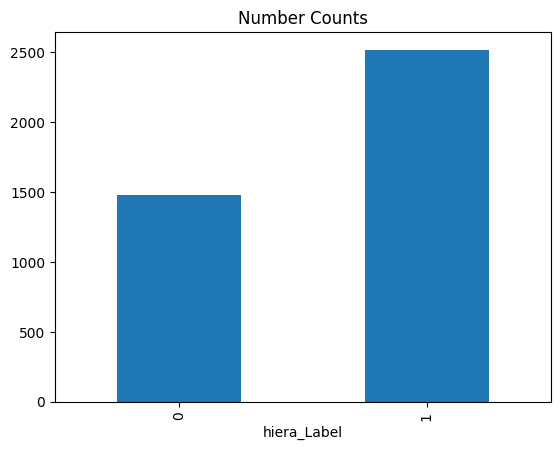

In [109]:
count = count_df.xs('Balance' ,axis = 1)
count.plot(kind='bar', title= 'Number Counts')
plt.show()

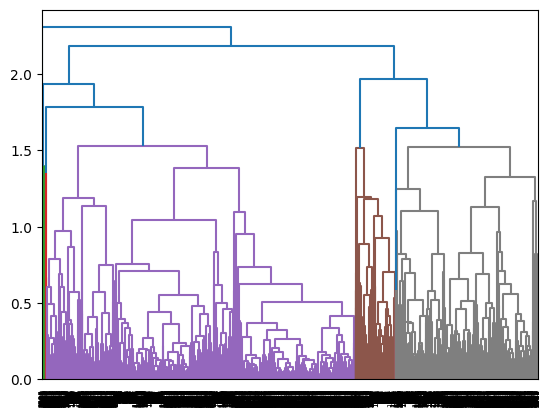

In [111]:

from scipy.cluster import hierarchy
hiera=hierarchy.linkage(hiera_scaled_data,method='complete')
dendrogram=hierarchy.dendrogram(hiera)


In [112]:
silhouette_avg = silhouette_score(hiera_scaled_data, hc_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.535888544052936


INFERENCES


KMEANS Clustering :-

number of cluster=6

Silhouette Score: 0.33378006995858245

Hierarchical clustering:-

number of clustering=2

Silhouette Score: 0.535888544052936

DBSCAN Clustering:-

Silhouette Score: 0.3340216337736371